In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn import metrics, pipeline
import time
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer


In [2]:
df = pd.read_csv("./dataset_5secondWindow/dataset_5secondWindow.csv")
df = df.dropna(axis=1, how="any", thresh=len(df)*.5, subset=None, inplace=False)
not_null = [col for col in df.columns if df[col].isnull().sum() < 1]
new_null = [i for i in df.columns if 1<= df[i].isnull().sum()<2374]

df1 = df[new_null].rolling(window=10, min_periods=1).mean()

df2= df[not_null]
df3= pd.concat([df2,df1], axis = 1)
df3 =df3.dropna(axis=0, how="any")




In [3]:
OE = OrdinalEncoder()
ct2 = np.asarray(df3['user'])
df3['user'] = OE.fit_transform(ct2.reshape(-1,1))
df3 = df3.sort_values(by='user', ascending=False)
df3


,Unnamed: 0,id,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,target,user,...,android.sensor.rotation_vector#min,android.sensor.rotation_vector#max,android.sensor.rotation_vector#std,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max
5552,5552,12725,138.0,8.0,10.535515,10.125175,10.749877,0.169090,Train,12.0,...,0.857950,0.885593,0.010903,68.703505,66.803039,70.603971,5.153743,1.523397,1.523397,1.523397
1705,1705,12709,122.0,8.0,10.557161,10.316969,10.756603,0.117200,Train,12.0,...,0.537044,0.554309,0.005424,78.557319,78.439066,78.675571,0.414930,10.339111,10.310485,10.386380
1661,1661,12633,46.0,8.0,10.516275,10.304059,10.762895,0.129571,Train,12.0,...,0.770404,0.788422,0.005661,75.047123,75.045619,75.048627,1.037949,5.828938,5.586892,6.042780
2226,2226,12834,92.0,85.0,11.086965,5.781501,16.839545,2.793992,Walking,12.0,...,0.734411,0.753077,0.011270,79.196090,79.196090,79.196090,4.549552,3.527446,3.527446,3.527446
612,612,12676,89.0,8.0,10.687654,10.057320,11.156710,0.229722,Train,12.0,...,0.544024,0.622282,0.033654,78.067297,78.067297,78.067297,0.892285,17.432550,17.432550,17.432550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,1442,2894,91.0,100.0,9.945741,9.926964,9.958218,0.009953,Still,0.0,...,0.801676,0.825646,0.008148,83.236451,83.015498,83.519119,3.371479,14.889920,14.889920,14.889920
3760,3760,130,37.0,8.0,10.040632,9.545363,11.252386,0.589625,Bus,0.0,...,0.630059,0.652510,0.014950,78.872606,78.438304,79.306907,0.921031,11.112602,11.112602,11.112602
1441,1441,1274,308.0,100.0,9.980562,9.026948,10.932016,0.524399,Car,0.0,...,0.777016,0.803974,0.009164,82.391581,82.170628,82.674249,3.178043,14.889920,14.889920,14.889920
1438,1438,7992,290.0,100.0,10.974559,4.600550,16.754085,3.998087,Walking,0.0,...,0.846312,0.871263,0.008290,86.776180,86.776180,86.776180,2.576859,2.250000,2.250000,2.250000


In [4]:
new_df = df3.copy()
ct = np.asarray(new_df['target'])
new_df['target'] = OE.fit_transform(ct.reshape(-1,1))
new_df

,Unnamed: 0,id,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,target,user,...,android.sensor.rotation_vector#min,android.sensor.rotation_vector#max,android.sensor.rotation_vector#std,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max
5552,5552,12725,138.0,8.0,10.535515,10.125175,10.749877,0.169090,3.0,12.0,...,0.857950,0.885593,0.010903,68.703505,66.803039,70.603971,5.153743,1.523397,1.523397,1.523397
1705,1705,12709,122.0,8.0,10.557161,10.316969,10.756603,0.117200,3.0,12.0,...,0.537044,0.554309,0.005424,78.557319,78.439066,78.675571,0.414930,10.339111,10.310485,10.386380
1661,1661,12633,46.0,8.0,10.516275,10.304059,10.762895,0.129571,3.0,12.0,...,0.770404,0.788422,0.005661,75.047123,75.045619,75.048627,1.037949,5.828938,5.586892,6.042780
2226,2226,12834,92.0,85.0,11.086965,5.781501,16.839545,2.793992,4.0,12.0,...,0.734411,0.753077,0.011270,79.196090,79.196090,79.196090,4.549552,3.527446,3.527446,3.527446
612,612,12676,89.0,8.0,10.687654,10.057320,11.156710,0.229722,3.0,12.0,...,0.544024,0.622282,0.033654,78.067297,78.067297,78.067297,0.892285,17.432550,17.432550,17.432550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,1442,2894,91.0,100.0,9.945741,9.926964,9.958218,0.009953,2.0,0.0,...,0.801676,0.825646,0.008148,83.236451,83.015498,83.519119,3.371479,14.889920,14.889920,14.889920
3760,3760,130,37.0,8.0,10.040632,9.545363,11.252386,0.589625,0.0,0.0,...,0.630059,0.652510,0.014950,78.872606,78.438304,79.306907,0.921031,11.112602,11.112602,11.112602
1441,1441,1274,308.0,100.0,9.980562,9.026948,10.932016,0.524399,1.0,0.0,...,0.777016,0.803974,0.009164,82.391581,82.170628,82.674249,3.178043,14.889920,14.889920,14.889920
1438,1438,7992,290.0,100.0,10.974559,4.600550,16.754085,3.998087,4.0,0.0,...,0.846312,0.871263,0.008290,86.776180,86.776180,86.776180,2.576859,2.250000,2.250000,2.250000


In [5]:
df_train = new_df.iloc[:3421,:]
df_test = new_df.iloc[3421:,:]

In [6]:
X_train = df_train.drop(['target','user'],axis=1)
#removing id column and unnamed column. not a feature needed for the training
X_train = X_train.iloc[:,2:]
y_train = df_train['target']
#print(X_train)
# Test set 

x_test = df_test.drop(['target','user'],axis =1)
x_test= x_test.iloc[:,2:]
y_test = df_test['target']


In [7]:
# clf = RandomForestClassifier(max_depth=9, n_estimators=1000,random_state=0)
# clf.fit(X_train, y_train)
# pred =clf.predict(x_test)
# acc = metrics.accuracy_score(y_test, pred)*100
# acc

In [8]:
tree_classifiers = {
  "Decision Tree": DecisionTreeClassifier(),
  "Extra Trees":ExtraTreesClassifier(),
  "Random Forest":RandomForestClassifier(),
  "AdaBoost":AdaBoostClassifier(),
  "Skl GBM": GradientBoostingClassifier(),
  "Skl HistGBM":HistGradientBoostingClassifier(),
  "XGBoost": XGBClassifier(),
  "LightGBM":LGBMClassifier(),
  "CatBoost": CatBoostClassifier(),
  "SVM":      SVC()}
tree_classifiers = {name: pipeline.make_pipeline( model) for name, model in tree_classifiers.items()}

results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})
for model_name, model in tree_classifiers.items():
    
    start_time = time.time()
    model.fit(X_train, y_train)
    total_time = time.time() - start_time
        
    pred = model.predict(x_test)
    
    results = results.append({"Model":    model_name,
                              "Accuracy": metrics.accuracy_score(y_test, pred)*100,
                              "Bal Acc.": metrics.balanced_accuracy_score(y_test, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)
                              
                              
results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')
print(results_ord)

C:\Users\omolara\anaconda3\envs\strive\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:26:32] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.084249
0:	learn: 1.5371875	total: 178ms	remaining: 2m 57s
1:	learn: 1.4757971	total: 217ms	remaining: 1m 48s
2:	learn: 1.4154086	total: 253ms	remaining: 1m 24s
3:	learn: 1.3646241	total: 292ms	remaining: 1m 12s
4:	learn: 1.3194065	total: 330ms	remaining: 1m 5s
5:	learn: 1.2806326	total: 366ms	remaining: 1m
6:	learn: 1.2522871	total: 408ms	remaining: 57.8s
7:	learn: 1.2160518	total: 453ms	remaining: 56.2s
8:	learn: 1.1883113	total: 499ms	remaining: 54.9s
9:	learn: 1.1668543	total: 554ms	remaining: 54.8s
10:	learn: 1.1429570	total: 600ms	remaining: 53.9s
11:	learn: 1.1181400	total: 656ms	remaining: 54s
12:	learn: 1.1038725	total: 700ms	remaining: 53.2s
13:	learn: 1.0863535	total: 

In [9]:
print(results_ord)


            Model   Accuracy   Bal Acc.       Time
1   Random Forest  49.352227  54.211087   1.719039
2        AdaBoost  49.352227  55.276487   1.050750
3     Extra Trees  47.570850  54.012228   0.827168
4        LightGBM  45.708502  51.299027   1.789559
5     Skl HistGBM  44.696356  50.654344  18.886466
6        CatBoost  44.089069  49.168963  43.098141
7         XGBoost  43.846154  48.739128   8.211961
8         Skl GBM  38.097166  40.892620  22.525630
9   Decision Tree  32.145749  34.027346   0.228572
10            SVM  18.542510  22.746019   1.374510


In [10]:
new_df1 = df3.copy()
new_df1['target']= new_df1['target'].apply({'Bus':0, 'Car':0,  'Train':0, 'Still':1,'Walking':2}.get) 
new_df1                                                                                                                                                                                                                                                                                                                                                                                               

,Unnamed: 0,id,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,target,user,...,android.sensor.rotation_vector#min,android.sensor.rotation_vector#max,android.sensor.rotation_vector#std,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max
5552,5552,12725,138.0,8.0,10.535515,10.125175,10.749877,0.169090,0,12.0,...,0.857950,0.885593,0.010903,68.703505,66.803039,70.603971,5.153743,1.523397,1.523397,1.523397
1705,1705,12709,122.0,8.0,10.557161,10.316969,10.756603,0.117200,0,12.0,...,0.537044,0.554309,0.005424,78.557319,78.439066,78.675571,0.414930,10.339111,10.310485,10.386380
1661,1661,12633,46.0,8.0,10.516275,10.304059,10.762895,0.129571,0,12.0,...,0.770404,0.788422,0.005661,75.047123,75.045619,75.048627,1.037949,5.828938,5.586892,6.042780
2226,2226,12834,92.0,85.0,11.086965,5.781501,16.839545,2.793992,2,12.0,...,0.734411,0.753077,0.011270,79.196090,79.196090,79.196090,4.549552,3.527446,3.527446,3.527446
612,612,12676,89.0,8.0,10.687654,10.057320,11.156710,0.229722,0,12.0,...,0.544024,0.622282,0.033654,78.067297,78.067297,78.067297,0.892285,17.432550,17.432550,17.432550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,1442,2894,91.0,100.0,9.945741,9.926964,9.958218,0.009953,1,0.0,...,0.801676,0.825646,0.008148,83.236451,83.015498,83.519119,3.371479,14.889920,14.889920,14.889920
3760,3760,130,37.0,8.0,10.040632,9.545363,11.252386,0.589625,0,0.0,...,0.630059,0.652510,0.014950,78.872606,78.438304,79.306907,0.921031,11.112602,11.112602,11.112602
1441,1441,1274,308.0,100.0,9.980562,9.026948,10.932016,0.524399,0,0.0,...,0.777016,0.803974,0.009164,82.391581,82.170628,82.674249,3.178043,14.889920,14.889920,14.889920
1438,1438,7992,290.0,100.0,10.974559,4.600550,16.754085,3.998087,2,0.0,...,0.846312,0.871263,0.008290,86.776180,86.776180,86.776180,2.576859,2.250000,2.250000,2.250000


In [11]:
df_train1 = new_df1.iloc[:3421,:]
df_test1 = new_df1.iloc[3421:,:]

In [12]:
X_train1 = df_train1.drop(['target','user'],axis=1)
#removing id column and unnamed column. not a feature needed for the training
X_train1 = X_train1.iloc[:,2:]
y_train1 = df_train1['target']
#print(X_train)
# Test set 

x_test1 = df_test1.drop(['target','user'],axis =1)
x_test1= x_test1.iloc[:,2:]
y_test1 = df_test1['target']

In [13]:
tree_classifiers1 = {
  "Decision Tree": DecisionTreeClassifier(),
  "Extra Trees":ExtraTreesClassifier(),
  "Random Forest":RandomForestClassifier(),
  "AdaBoost":AdaBoostClassifier(),
  "Skl GBM": GradientBoostingClassifier(),
  "Skl HistGBM":HistGradientBoostingClassifier(),
  "XGBoost": XGBClassifier(),
  "LightGBM":LGBMClassifier(),
  "CatBoost": CatBoostClassifier(),
  "SVM":      SVC()}
tree_classifiers1 = {name: pipeline.make_pipeline( model) for name, model in tree_classifiers1.items()}

results1 = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})
for model_name, model in tree_classifiers1.items():
    
    start_time = time.time()
    model.fit(X_train1, y_train1)
    total_time = time.time() - start_time
        
    pred1 = model.predict(x_test1)
    
    results1 = results1.append({"Model":    model_name,
                              "Accuracy": metrics.accuracy_score(y_test1, pred1)*100,
                              "Bal Acc.": metrics.balanced_accuracy_score(y_test1, pred1)*100,
                              "Time":     total_time},
                              ignore_index=True)
                              
                              
results_ord1 = results1.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord1.index += 1 
results_ord1.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')

C:\Users\omolara\anaconda3\envs\strive\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:27:54] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.084249
0:	learn: 1.0248116	total: 33.3ms	remaining: 33.2s
1:	learn: 0.9615739	total: 56.9ms	remaining: 28.4s
2:	learn: 0.9017012	total: 81.5ms	remaining: 27.1s
3:	learn: 0.8551339	total: 110ms	remaining: 27.3s
4:	learn: 0.8067640	total: 137ms	remaining: 27.2s
5:	learn: 0.7663907	total: 159ms	remaining: 26.4s
6:	learn: 0.7382003	total: 181ms	remaining: 25.6s
7:	learn: 0.7136185	total: 207ms	remaining: 25.6s
8:	learn: 0.6874987	total: 238ms	remaining: 26.2s
9:	learn: 0.6641456	total: 276ms	remaining: 27.4s
10:	learn: 0.6449914	total: 311ms	remaining: 28s
11:	learn: 0.6279344	total: 347ms	remaining: 28.5s
12:	learn: 0.6092733	total: 372ms	remaining: 28.3s
13:	learn: 0.5947105	total

,Model,Accuracy,Bal Acc.,Time
1,Random Forest,84.898785,80.624764,1.774257
2,Extra Trees,82.874494,75.793551,0.605138
3,CatBoost,80.607287,75.130273,29.107186
4,LightGBM,80.040486,77.458397,1.055176
5,Skl HistGBM,79.959514,76.832446,8.390547
6,XGBoost,78.947368,72.798458,4.377326
7,AdaBoost,76.801619,72.870125,1.540838
8,Skl GBM,76.801619,66.645568,13.431089
9,SVM,63.238866,39.823277,1.525878
10,Decision Tree,61.457490,53.934886,0.256672


In [14]:
results_ord1

,Model,Accuracy,Bal Acc.,Time
1,Random Forest,84.898785,80.624764,1.774257
2,Extra Trees,82.874494,75.793551,0.605138
3,CatBoost,80.607287,75.130273,29.107186
4,LightGBM,80.040486,77.458397,1.055176
5,Skl HistGBM,79.959514,76.832446,8.390547
6,XGBoost,78.947368,72.798458,4.377326
7,AdaBoost,76.801619,72.870125,1.540838
8,Skl GBM,76.801619,66.645568,13.431089
9,SVM,63.238866,39.823277,1.525878
10,Decision Tree,61.457490,53.934886,0.256672


In [15]:
results_ord.to_csv('benmarch_model.csv')
results_ord1.to_csv('feature_engineer_model.csv')

In [16]:
# X_train = df_train.drop(['target','user'],axis=1)
# #removing id column and unnamed column. not a feature needed for the training
# X_train = X_train.iloc[:,2:]
# y_train = df_train['target']
# #print(X_train)
# # Test set 

# x_test = df_test.drop(['target','user'],axis =1)
# x_test= x_test.iloc[:,2:]
# y_test = df_test['target']

In [28]:
tree_classifiers2 = {
  "Decision Tree": DecisionTreeClassifier(max_depth=8, random_state=0),
  "Extra Trees":ExtraTreesClassifier(max_depth=9, n_estimators=1000,random_state=0),
  "Random Forest":RandomForestClassifier(max_depth=9, n_estimators=1000,random_state=0),
  "AdaBoost":AdaBoostClassifier(learning_rate=0.1, n_estimators=1000, random_state=0),
  "LightGBM":LGBMClassifier(learning_rate=0.1, n_estimators=1000, random_state=0),
  "SVM":      SVC(kernel='linear', C=1000,random_state=0)}
tree_classifiers2 = {name: pipeline.make_pipeline( model) for name, model in tree_classifiers2.items()}

results2 = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})
for model_name, model in tree_classifiers2.items():
    
    start_time = time.time()
    model.fit(X_train1, y_train1)
    total_time = time.time() - start_time
        
    pred2 = model.predict(x_test1)
    
    results2 = results2.append({"Model":    model_name,
                              "Accuracy": metrics.accuracy_score(y_test1, pred2)*100,
                              "Bal Acc.": metrics.balanced_accuracy_score(y_test1, pred2)*100,
                              "Time":     total_time},
                              ignore_index=True)
results_ord2 = results2.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord2.index += 1 
results_ord2.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')


In [18]:
results_ord2
results_ord2.to_csv('hyper_param_model.csv')

In [19]:
df['user'].unique()

array(['U12', 'U1', 'U8', 'U7', 'U10', 'U13', 'U6', 'U11', 'U3', 'U2',
       'U4', 'U9', 'U5'], dtype=object)

In [20]:
397+214+79+17+279+227

1213

In [21]:
df_train = df.iloc[:4680,:]
df_test = df.iloc[4680:,:]
df_train['user'].unique()

array(['U12', 'U1', 'U8', 'U7', 'U10', 'U13', 'U6', 'U11', 'U3', 'U2',
       'U4', 'U9', 'U5'], dtype=object)

In [22]:
five_second_data = pd.read_csv("./dataset_5secondWindow/dataset_5secondWindow.csv")
five_second_data.isnull().sum()

Unnamed: 0                  0
id                          0
time                        0
activityrecognition#0    5893
activityrecognition#1       0
                         ... 
speed#min                2373
speed#max                2373
speed#std                4575
target                      0
user                        0
Length: 71, dtype: int64

In [23]:
five_second_data.shape

(5893, 71)

In [24]:
not_null_col = [col for col in five_second_data.columns if five_second_data[col].isnull().sum()<800]
print(not_null_col)

['Unnamed: 0', 'id', 'time', 'activityrecognition#1', 'android.sensor.accelerometer#mean', 'android.sensor.accelerometer#min', 'android.sensor.accelerometer#max', 'android.sensor.accelerometer#std', 'android.sensor.game_rotation_vector#mean', 'android.sensor.game_rotation_vector#min', 'android.sensor.game_rotation_vector#max', 'android.sensor.gravity#mean', 'android.sensor.gravity#min', 'android.sensor.gravity#max', 'android.sensor.gravity#std', 'android.sensor.gyroscope#mean', 'android.sensor.gyroscope#min', 'android.sensor.gyroscope#max', 'android.sensor.gyroscope#std', 'android.sensor.gyroscope_uncalibrated#mean', 'android.sensor.gyroscope_uncalibrated#min', 'android.sensor.gyroscope_uncalibrated#max', 'android.sensor.gyroscope_uncalibrated#std', 'android.sensor.linear_acceleration#mean', 'android.sensor.linear_acceleration#min', 'android.sensor.linear_acceleration#max', 'android.sensor.linear_acceleration#std', 'android.sensor.magnetic_field#mean', 'android.sensor.magnetic_field#mi

<AxesSubplot:>

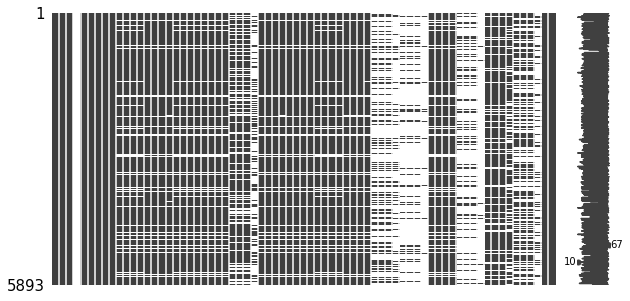

In [25]:
missingno.matrix(five_second_data,figsize=(10,5), fontsize=12)

<AxesSubplot:>

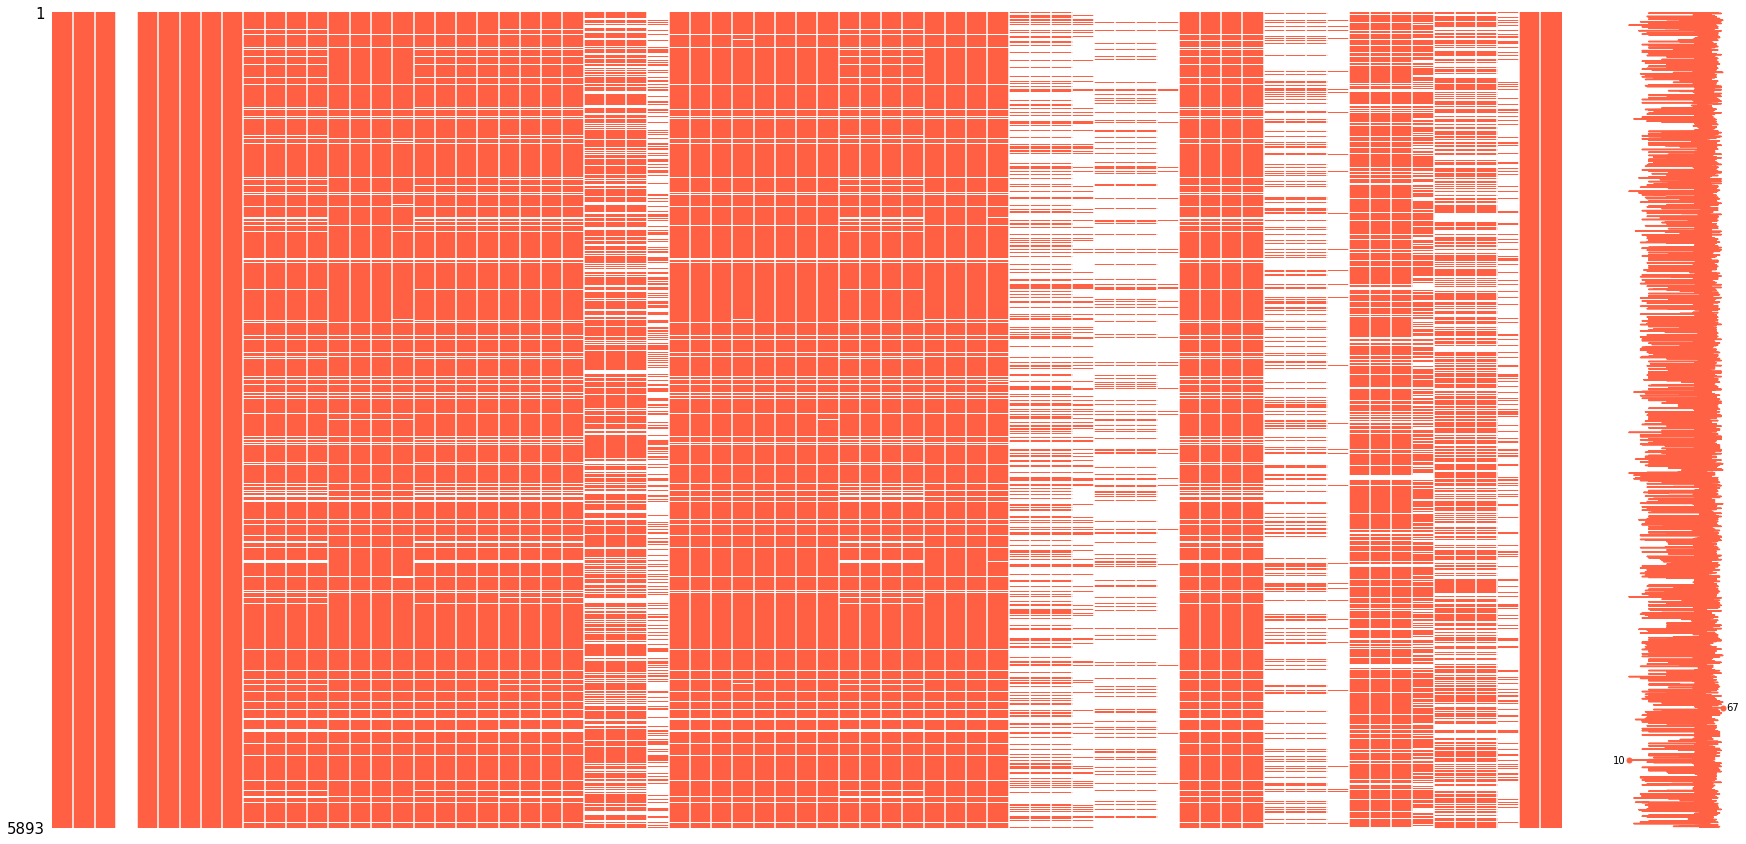

In [26]:
missingno.matrix(five_second_data, figsize=(30,15), fontsize=12, color=(1, 0.38, 0.27))

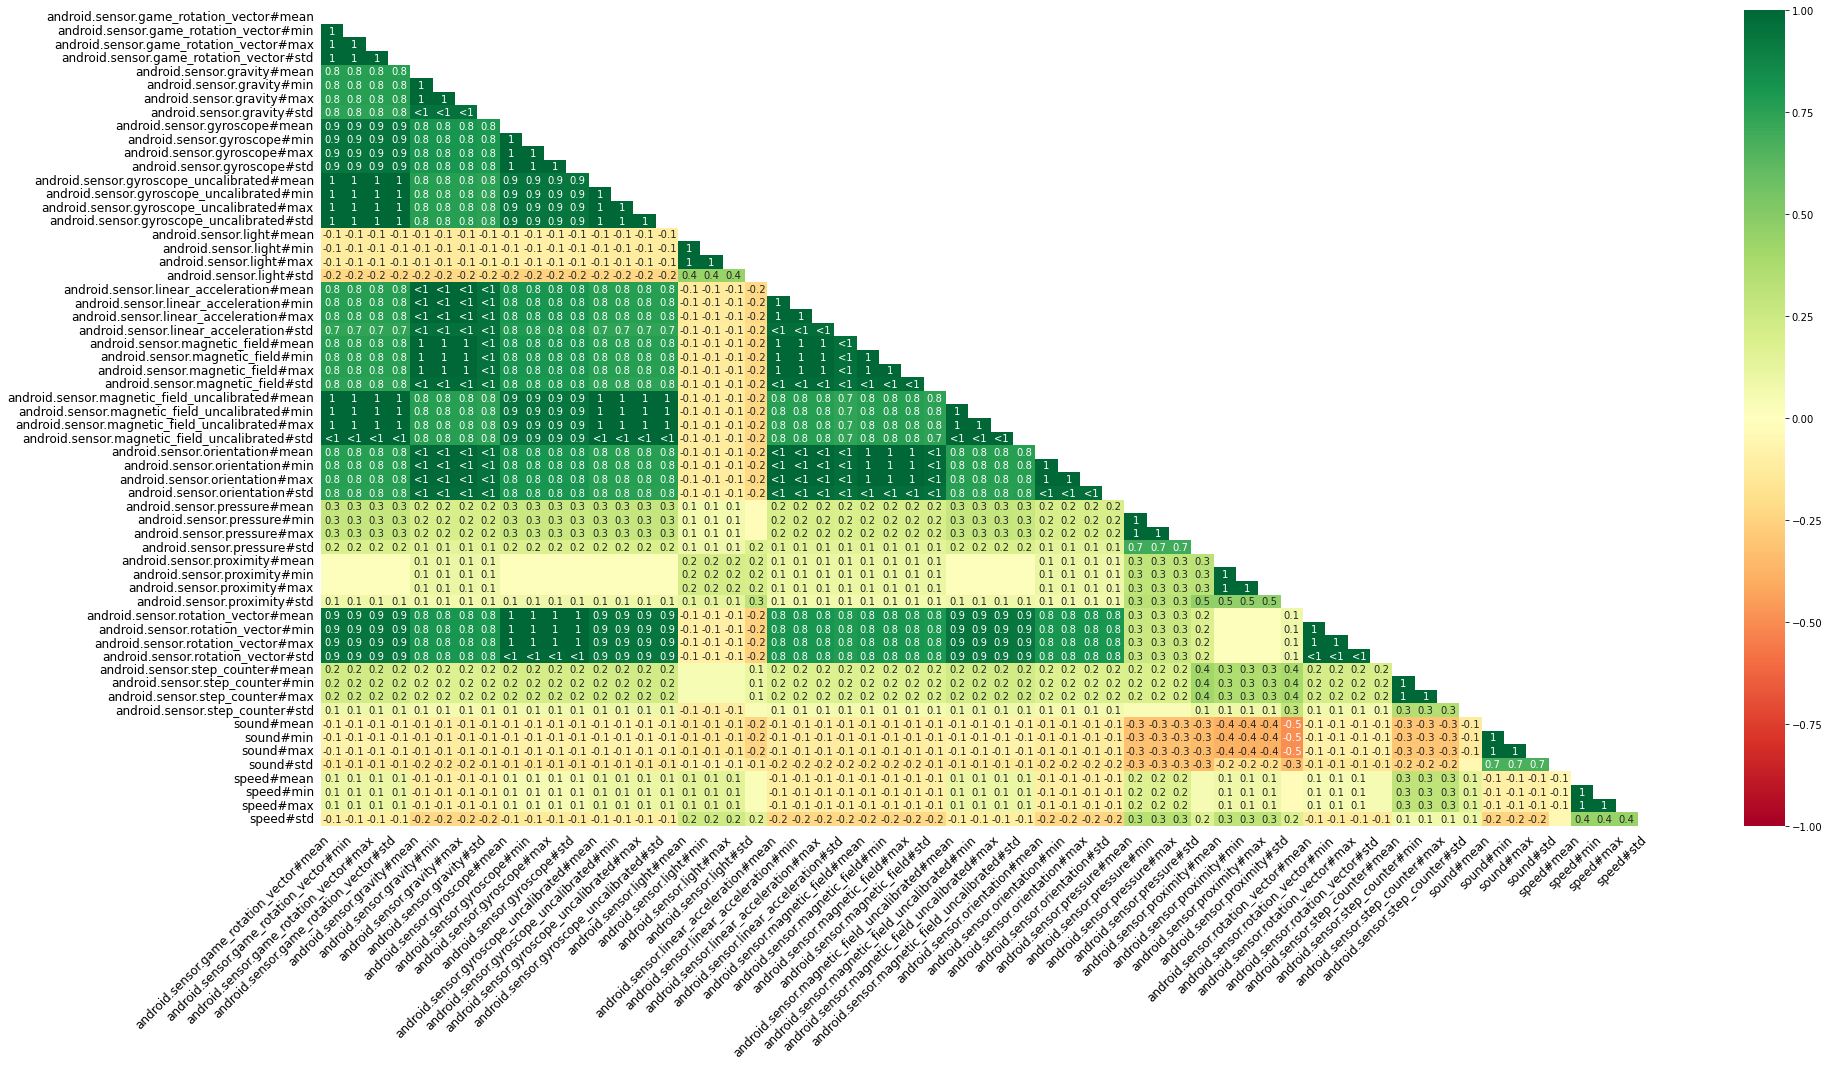

In [27]:
missingno.heatmap(five_second_data, cmap="RdYlGn", figsize=(30,15), fontsize=12);